In [1]:
import pandas as pd


df = pd.read_json('../neural_networks/perceptron/logs/executions/iris/output-1714836189950.json')
df_predictions = pd.read_csv('../neural_networks/perceptron/logs/predictions/iris/predictions-1714836189950.csv')

In [2]:
df

,epoch,weights,accuracy_validation,mse_training,accuracy_training,mse_validation,bias
0,99,"[[0.41691513859098306, 0.915692036391862, -1.1...",0.955556,0.057143,0.971429,0.088889,-1.343245e-17
1,98,"[[0.415240546314587, 0.911952233950243, -1.176...",0.955556,0.057143,0.971429,0.088889,-1.309966e-17
2,97,"[[0.413557294455872, 0.9081900419847231, -1.17...",0.955556,0.057143,0.971429,0.088889,-1.332213e-17
3,96,"[[0.41186524789365003, 0.9044050675099, -1.167...",0.955556,0.057143,0.971429,0.088889,-1.285994e-17
4,95,"[[0.410164267087165, 0.9005969050238931, -1.16...",0.955556,0.057143,0.971429,0.088889,-1.260016e-17
...,...,...,...,...,...,...,...
95,4,"[[0.11385644149974401, 0.21309554284544502, -0...",0.622222,0.628571,0.685714,0.755556,-7.216450e-19
96,3,"[[0.10210820641710001, 0.188289463525484, -0.1...",0.622222,0.628571,0.685714,0.755556,-8.326673e-19
97,2,"[[0.08944764218732601, 0.161779955715179, -0.1...",0.622222,0.628571,0.685714,0.755556,6.661338e-19
98,1,"[[0.07638419142720901, 0.133743059104038, -0.1...",0.622222,0.628571,0.685714,0.755556,7.216450e-19


<Axes: xlabel='epoch'>

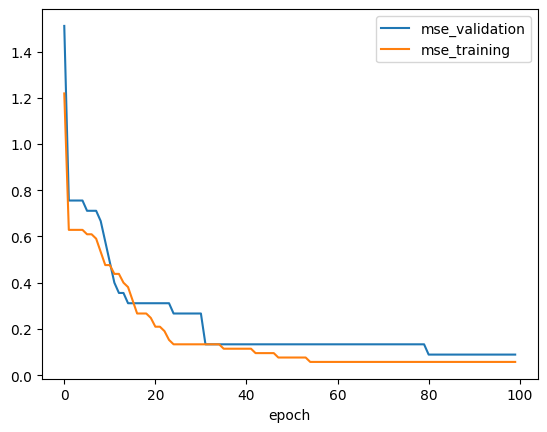

In [3]:
# Plot a line graph comparing mse_validation, mse_test and mse_train for each epoch called iteration of 1000 first rows
df.plot(x='epoch', y=['mse_validation', 'mse_training'])

<Axes: xlabel='epoch'>

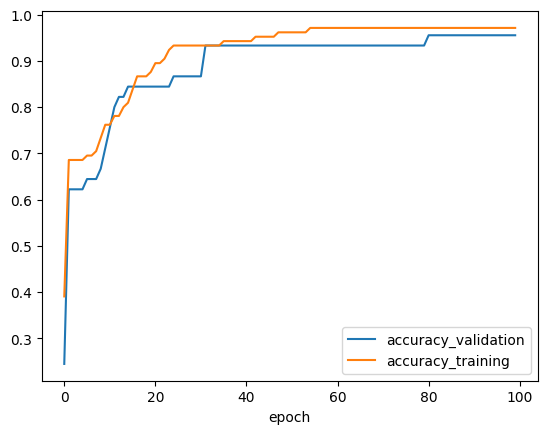

In [4]:
# Plot a line graph comparing accuracy_validation, accuracy_test and accuracy_train for each epoch called iteration
df.plot(x='epoch', y=['accuracy_validation', 'accuracy_training'])

In [5]:
df_predictions.head()

,feature0,feature1,feature2,feature3,expected,predicted
0,5.4,3.9,1.7,0.4,Iris-setosa,Iris-setosa
1,6.2,2.2,4.5,1.5,Iris-versicolor,Iris-versicolor
2,5.8,2.7,4.1,1.0,Iris-versicolor,Iris-versicolor
3,6.7,3.3,5.7,2.1,Iris-virginica,Iris-virginica
4,5.1,3.4,1.5,0.2,Iris-setosa,Iris-setosa


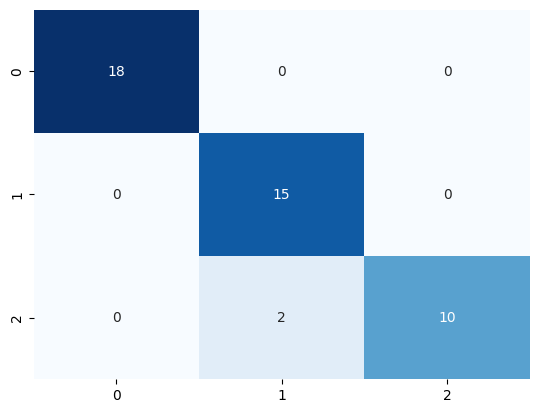

In [6]:
# Plot matrix of confusion with legend
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(
    df_predictions['expected'], 
    df_predictions['predicted'], 
    labels=["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
)

sns.matrix = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

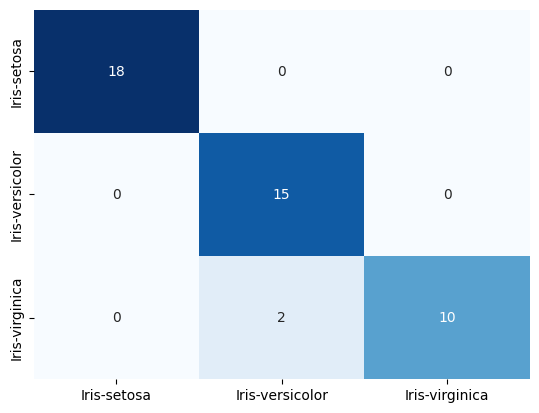

In [7]:
# Plot matrix of confusion with legend showing which classes were better predicted
cm = confusion_matrix(
    df_predictions['expected'], 
    df_predictions['predicted'], 
    labels=["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
)

sns.matrix = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                         xticklabels=["Iris-setosa", "Iris-versicolor", "Iris-virginica"],
                         yticklabels=["Iris-setosa", "Iris-versicolor", "Iris-virginica"])


In [8]:
df_predictions.where(df_predictions['expected'] != df_predictions['predicted']).dropna()

,feature0,feature1,feature2,feature3,expected,predicted
18,6.0,2.7,5.1,1.6,Iris-virginica,Iris-versicolor
34,5.6,3.0,4.5,1.5,Iris-virginica,Iris-versicolor


In [9]:
df.iloc[0]

epoch                                                                 99
weights                [[0.41691513859098306, 0.915692036391862, -1.1...
accuracy_validation                                             0.955556
mse_training                                                    0.057143
accuracy_training                                               0.971429
mse_validation                                                  0.088889
bias                                                                -0.0
Name: 0, dtype: object

In [10]:
#first row
df.iloc[0]['weights']

[[0.41691513859098306,
  0.915692036391862,
  -1.181887318630435,
  -0.493278145366538],
 [0.23380903051418703,
  -0.11015072497502801,
  0.19119988117948,
  -0.105630192923805],
 [-0.464488016336829,
  -0.5836158277291611,
  1.074579448868787,
  0.8093793116477851]]

In [11]:
df.iloc[-1]['weights']

[[0.066237573706873,
  0.105809655904833,
  -0.062487050022837005,
  0.048635577376212005],
 [0.060231712742607,
  0.051230234624584,
  0.062741991037393,
  0.07659532165209701],
 [0.05976686631886301,
  0.06488559315825901,
  0.083637070403274,
  0.08524007432913101]]

In [12]:
df.iloc[0]['bias']

-1.3432451765466073e-17